In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('netflix_titles.csv')

In [4]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [6]:
print(df.shape)
print(f'Rows = {df.shape[0]}, Columns = {df.shape[1]}')

(8807, 12)
Rows = 8807, Columns = 12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
#filling the null values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna(df['country'].mode()[0], inplace=True)


In [11]:
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           4
duration         3
listed_in        0
description      0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
# changing the date format
df["date_added"] = pd.to_datetime(df['date_added'].str.strip(),format="%B %d, %Y", errors='coerce')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


In [17]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [18]:
# adding separate columsn from date like day,month,year
df['Day_added'] = df['date_added'].dt.day
df['Month_added'] = df['date_added'].dt.month_name()
df['Year'] = df['date_added'].dt.year
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Day_added,Month_added,Year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",25,September,2021
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",24,September,2021


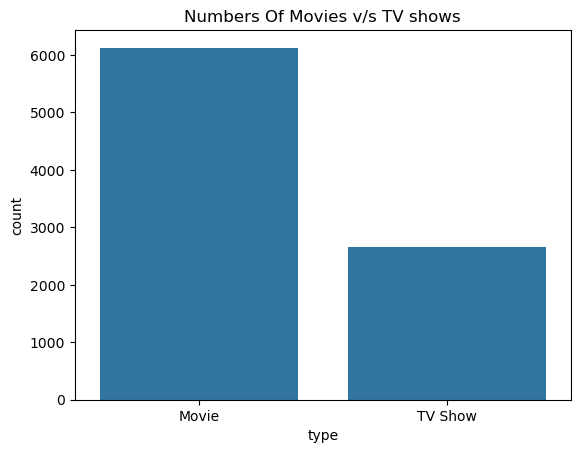

In [19]:
sns.countplot( x = 'type', data= df)
plt.title('Numbers Of Movies v/s TV shows')
plt.show()

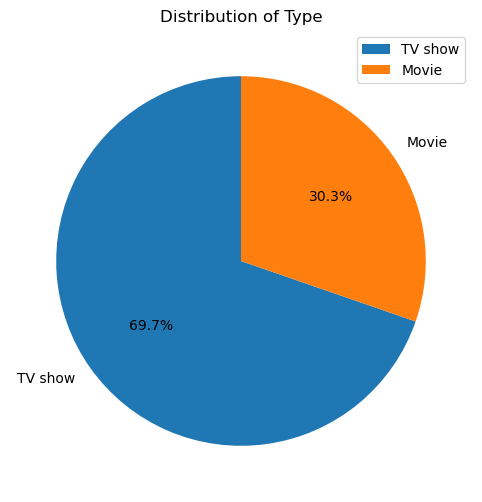

In [20]:
plt.figure(figsize=(9,6))
labels = ['TV show', 'Movie']
size = df['type'].value_counts()

plt.pie(size, labels = labels, autopct='%1.1f%%', startangle = 90)
plt.title("Distribution of Type")
plt.legend()
plt.show()

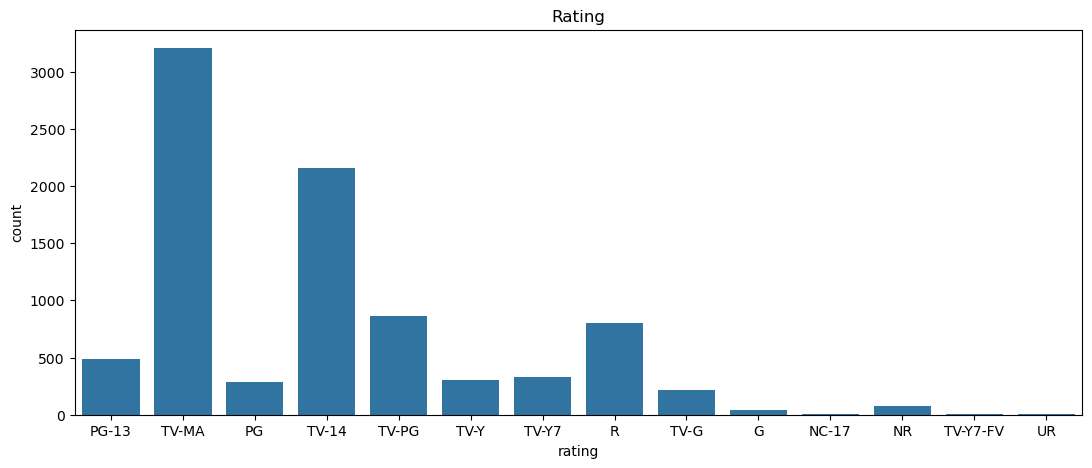

In [21]:
plt.figure(figsize=(13,5))
sns.countplot(x = 'rating', data=df)
plt.title('Rating')
plt.show()

In [22]:
rating_counts = df.groupby(['type','rating']).size().reset_index(name='count')
top_ratings = rating_counts.loc[rating_counts.groupby('type')['count'].idxmax()]

print(top_ratings)

       type rating  count
8     Movie  TV-MA   2062
18  TV Show  TV-MA   1143


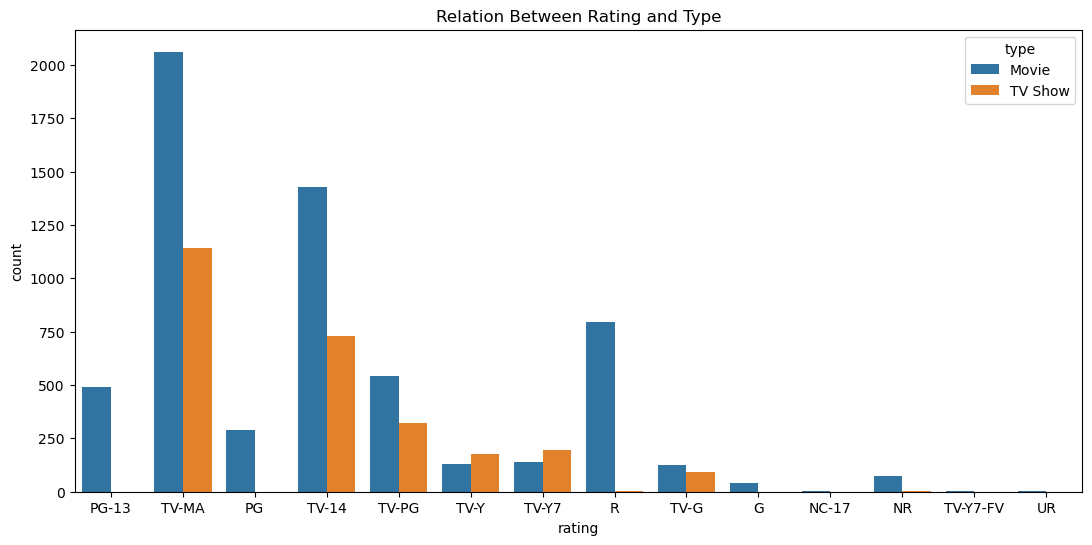

In [23]:
plt.figure(figsize=(13,6))
sns.countplot(x = 'rating', hue = 'type',data = df)
plt.title('Relation Between Rating and Type')
plt.show()

In [24]:
df['cast'].unique()

array(['Unknown',
       'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng',
       'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera',
       ...,
       'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf',
       'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers',
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy'],
      shape=(7679,), dtype=object)

# Movies Released in 2020

In [25]:
movies_2020 = df[(df['type'] == 'Movie') & (df['release_year'] == 2020)]
print(movies_2020[['title']])

                                                  title
0                                  Dick Johnson Is Dead
16    Europe's Most Dangerous Man: Otto Skorzeny in ...
78                                       Tughlaq Durbar
84                                 Omo Ghetto: the Saga
103                                      Shadow Parties
...                                                 ...
3046                      All the Freckles in the World
3060                                      Ghost Stories
5972                                   #cats_the_mewvie
7594                 Norm of the North: Family Vacation
8099                                        Straight Up

[517 rows x 1 columns]


# Top 5 countries with Most Content

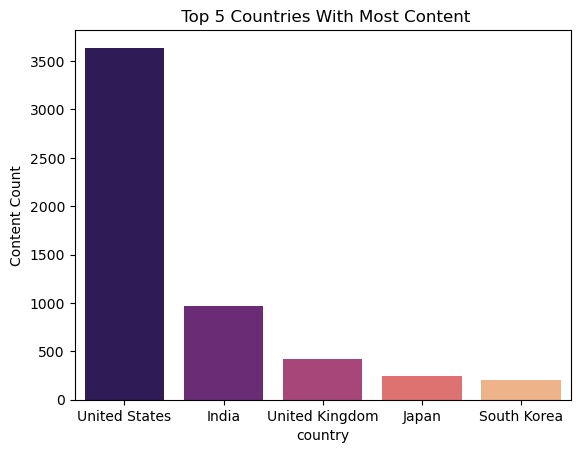

In [26]:
top_countries = df['country'].value_counts().head(5)

sns.barplot(x = top_countries.index, y = top_countries.values, palette = 'magma')
plt.title(" Top 5 Countries With Most Content")
plt.ylabel('Content Count')
plt.show()

# Longest movie

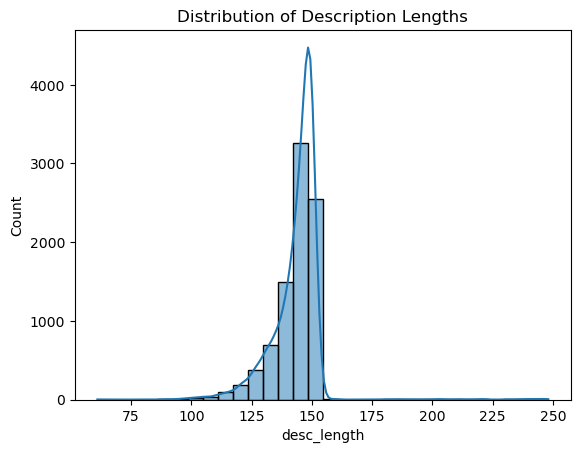

In [27]:
df['desc_length'] = df['description'].astype(str).apply(len)

sns.histplot(df['desc_length'], bins=30, kde=True)
plt.title("Distribution of Description Lengths")
plt.show()

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
 12  Day_added     8790 non-null   int32         
 13  Month_added   8790 non-null   object        
 14  Year          8790 non-null   int32         
 15  desc_length   8790 non-null   int64        

# Distrubation of Release Year

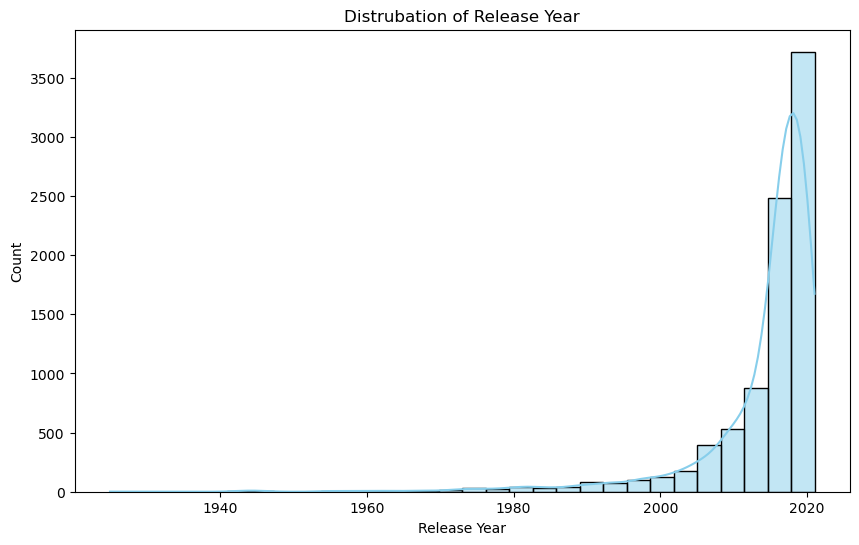

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(df['release_year'], bins=30, kde= True, color='skyblue')
plt.title("Distrubation of Release Year")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()

#  Violent Content Categorization


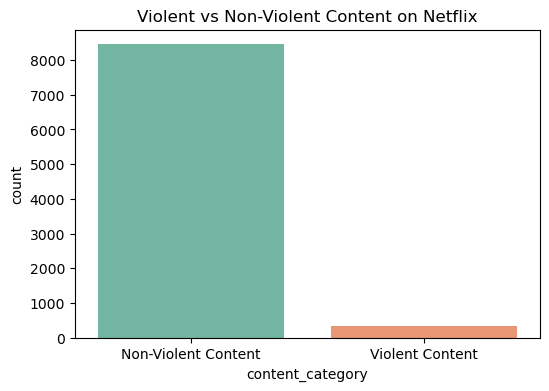

In [32]:
df['content_category'] = df['description'].apply(
    lambda x: "Violent Content" if pd.notnull(x) and ("kill" in x.lower() or "violence" in x.lower()) else "Non-Violent Content"
)

plt.figure(figsize=(6,4))
sns.countplot(x='content_category', data=df, palette="Set2")
plt.title("Violent vs Non-Violent Content on Netflix")
plt.show()


In [42]:
df['desc_length'] = df['description'].astype(str).apply(len)

df_movies = df[df['type']=="Movie"].copy()
df_movies['runtime'] = df_movies['duration'].str.replace(" min","", regex=False)
df_movies['runtime'] = pd.to_numeric(df_movies['runtime'], errors='coerce')


# Hypothesis Testing


In [37]:
movie_desc = df[df['type']=="Movie"]['description'].dropna().apply(len)
tv_desc = df[df['type']=="TV Show"]['description'].dropna().apply(len)

t_stat, p_val = stats.ttest_ind(movie_desc, tv_desc, equal_var=False)
print("\nHypothesis Test: Movie vs TV Show Description Lengths")
print("t-statistic:", t_stat, "\np-value:", p_val)

if p_val < 0.05:
    print("Result: Significant difference in description lengths.")
else:
    print("Result: No significant difference.")




Hypothesis Test: Movie vs TV Show Description Lengths
t-statistic: 4.538319429266276 
p-value: 5.7876206457175425e-06
Result: Significant difference in description lengths.


In [38]:
# linear Regression

In [48]:
x = df_movies[['release_year', 'desc_length']]
y = df_movies['runtime']

In [58]:
#Train test split
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=0.2, random_state=42)

#fit model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [62]:
# predictions

y_pred = model.predict(x_test)

print("\nLinearRegression Results:")
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("R^2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


LinearRegression Results:
Coefficients: [-0.62318854  0.03870082]
Intercept: 1348.576105884881
R^2 Score: 0.03386219230816767
RMSE: 26.29472203275702


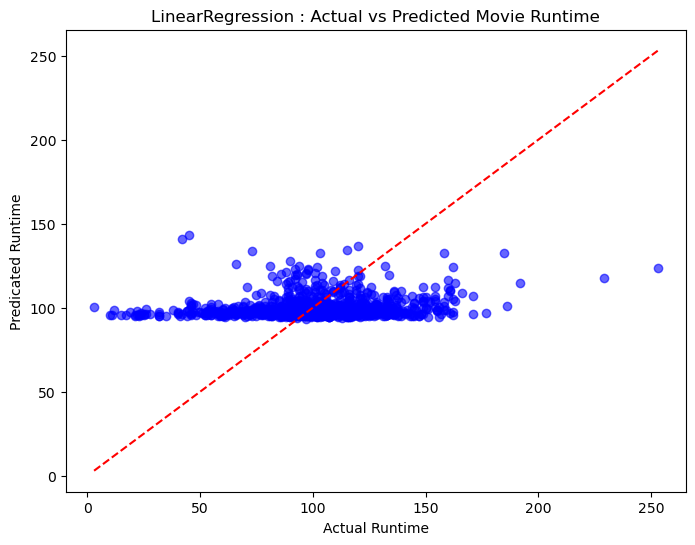

In [68]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Runtime")
plt.ylabel("Predicated Runtime")
plt.title("LinearRegression : Actual vs Predicted Movie Runtime")
plt.show()

In [70]:
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
Index: 6126 entries, 0 to 8806
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   show_id           6126 non-null   object        
 1   type              6126 non-null   object        
 2   title             6126 non-null   object        
 3   director          6126 non-null   object        
 4   cast              6126 non-null   object        
 5   country           6126 non-null   object        
 6   date_added        6126 non-null   datetime64[ns]
 7   release_year      6126 non-null   int64         
 8   rating            6126 non-null   object        
 9   duration          6126 non-null   object        
 10  listed_in         6126 non-null   object        
 11  description       6126 non-null   object        
 12  Day_added         6126 non-null   int32         
 13  Month_added       6126 non-null   object        
 14  Year              6126 non-nu